# Guía Práctica de TensorFlow: Clasificación del Dataset Iris

## Instalación e Importación de Librerías

### Instalación

Primero, asegúrate de tener TensorFlow y otras librerías necesarias instaladas. Puedes hacerlo ejecutando el siguiente comando en una celda de Jupyter Notebook:

In [1]:
!pip install tensorflow pandas scikit-learn

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.7.4-py3-none-any.whl.metadata (2.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:0102
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 1.4 MB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

### Importación de Librerías

Una vez instaladas las librerías, importamos las necesarias para nuestro proyecto. Esto incluye TensorFlow para la creación y entrenamiento del modelo, pandas para el manejo de datos en formato de DataFrame, y algunas herramientas de scikit-learn para la preparación de datos.

In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

- `tensorflow` es la biblioteca principal que usaremos para crear y entrenar nuestro modelo de red neuronal.
- `pandas` se utiliza para manejar y manipular datos de manera eficiente.
- `train_test_split` de `sklearn.model_selection` nos permite dividir los datos en conjuntos de entrenamiento y prueba.
- `StandardScaler` de `sklearn.preprocessing` se usa para normalizar las características de los datos, asegurando que todas las características tengan una escala similar.
- `load_iris` de `sklearn.datasets` carga el dataset Iris, que utilizaremos para entrenar y evaluar nuestro modelo.

## Carga y Preparación de Datos

### Carga del Dataset

El dataset Iris se puede cargar usando la función `load_iris` de `sklearn.datasets`.

In [3]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

- `X` contiene las características de las flores (longitud y ancho del sépalo y pétalo).
- `y` contiene las etiquetas de clase (0, 1 o 2 para las tres especies de Iris).

### Conversión a DataFrame

Convertimos los datos a un DataFrame para facilitar su manejo:

In [4]:
# Convertir a un DataFrame para facilitar el manejo
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

### División de Datos

Dividimos los datos en conjuntos de entrenamiento y prueba:

In [5]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- `test_size=0.2` significa que el 20% de los datos se utilizarán para pruebas y el 80% para entrenamiento.
- `random_state=42` asegura que la división sea reproducible.

### Normalización de Datos

Normalizamos los datos para que todas las características tengan una escala similar:

In [6]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- `fit_transform` ajusta el escalador a los datos de entrenamiento y transforma estos datos.
- `transform` aplica la misma transformación a los datos de prueba.

## Creación del Modelo

### Definición del Modelo

Creamos un modelo de red neuronal secuencial usando `tf.keras.Sequential` y añadimos capas densas (`Dense`) para formar la red. La última capa tiene 3 neuronas (una por cada clase de iris) y una función de activación softmax para la clasificación.

In [7]:
# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/Users/usr/Documents/PROTECO/CursoPythonAvanzado/clase02/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- `Dense(10, activation='relu', input_shape=(X_train.shape[1],))` crea una capa densa con 10 neuronas y función de activación ReLU. `input_shape` especifica la forma de entrada de los datos (número de características).
- `Dense(10, activation='relu')` añade otra capa densa con 10 neuronas y función de activación ReLU.
- `Dense(3, activation='softmax')` crea la capa de salida con 3 neuronas (una por cada clase) y función de activación softmax para la clasificación multiclase.

### Compilación del Modelo

Compilamos el modelo especificando el optimizador, la función de pérdida y las métricas a monitorizar durante el entrenamiento.

In [8]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

- `optimizer='adam'` especifica que usaremos el optimizador Adam, que es eficiente y popular para muchas tareas de aprendizaje automático.
- `loss='sparse_categorical_crossentropy'` define la función de pérdida apropiada para problemas de clasificación multiclase con etiquetas enteras.
- `metrics=['accuracy']` especifica que queremos monitorizar la exactitud del modelo durante el entrenamiento.

## Entrenamiento del Modelo

### Proceso de Entrenamiento

Entrenamos el modelo usando los datos de entrenamiento. Establecemos el número de épocas (`epochs`) y el tamaño del lote (`batch_size`).

In [9]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3047 - loss: 1.0107 - val_accuracy: 0.5833 - val_loss: 0.7972
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5690 - loss: 0.9764 - val_accuracy: 0.6667 - val_loss: 0.7899
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6029 - loss: 0.9513 - val_accuracy: 0.6667 - val_loss: 0.7828
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6354 - loss: 0.9520 - val_accuracy: 0.6667 - val_loss: 0.7759
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6055 - loss: 0.9372 - val_accuracy: 0.6667 - val_loss: 0.7691
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6523 - loss: 0.8934 - val_accuracy: 0.6667 - val_loss: 0.7626
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6289 - loss: 0.8938 - val_accuracy: 0.6667 - val_loss: 0.7559
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6016 - loss: 0.8857 - val_accuracy: 0.7083 - val_loss: 0.7496


- `epochs=50` indica que el modelo entrenará durante 50 épocas.
- `batch_size=32` define el tamaño del lote que se usará durante cada iteración de entrenamiento.
- `validation_split=0.2` significa que el 20% de los datos de entrenamiento se usarán para validación.

### Visualización del Proceso de Entrenamiento

Podemos visualizar la evolución de la precisión y la pérdida durante el entrenamiento:

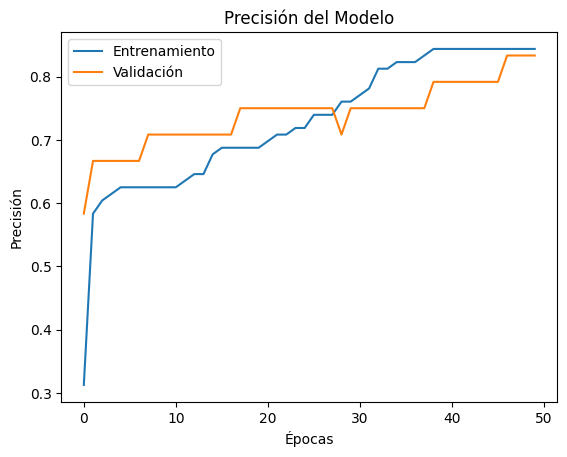

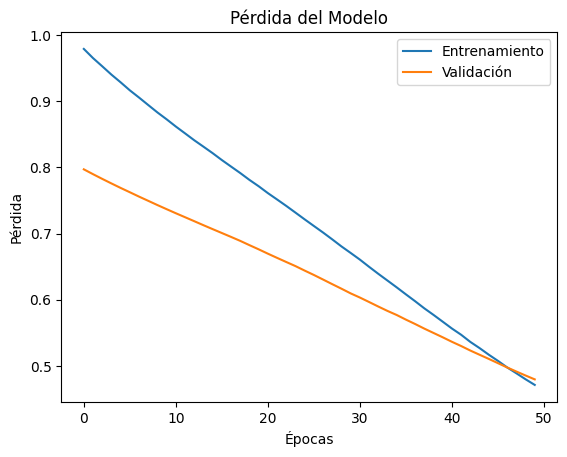

In [22]:
import matplotlib.pyplot as plt

# Graficar la precisión del entrenamiento y validación
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida del entrenamiento y validación
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## Evaluación del Modelo

### Evaluación en Datos de Prueba

Evaluamos el modelo entrenado usando los datos de prueba para obtener la precisión final.

In [12]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8333 - loss: 0.4466
Precisión en el conjunto de prueba: 0.8333


### Predicción con el Modelo

Realizamos predicciones con el modelo entrenado y comparamos las etiquetas predichas con las etiquetas verdaderas.

In [21]:
# Realizar predicciones
predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1)

# Comparar etiquetas predichas con las etiquetas verdaderas
print(predicted_classes.numpy())
print(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[2 0 2 2 2 0 1 2 2 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


- `predict` realiza predicciones con el modelo entrenado.
- `tf.argmax` devuelve el índice de la clase con la mayor probabilidad.
- `numpy()` convierte el tensor de TensorFlow en un array de NumPy para facilitar su visualización.

## Guardar y Cargar el Modelo

### Guardar el Modelo

Podemos guardar el modelo entrenado para uso futuro.

In [15]:
# Guardar el modelo
model.save('modelo_iris.keras')

### Cargar el Modelo

Para cargar el modelo guardado y usarlo para predicciones, hacemos lo siguiente:

In [16]:
# Cargar el modelo guardado
modelo_cargado = tf.keras.models.load_model('modelo_iris.keras')

# Usar el modelo cargado para hacer predicciones
predicciones = modelo_cargado.predict(X_test)
clases_predichas = tf.argmax(predicciones, axis=1)
print(clases_predichas.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[2 0 2 2 2 0 1 2 2 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


/Users/usr/Documents/PROTECO/CursoPythonAvanzado/clase02/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Conclusión

En esta guía, hemos aprendido a construir, entrenar y evaluar un modelo de red neuronal utilizando TensorFlow para la clasificación del dataset Iris. También hemos cubierto cómo guardar y cargar el modelo para uso futuro.